In [3]:

# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
# importing the dataset
df = pd.read_csv('Lab dataset diabetes2.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
print("Dataset Preview:\n",df.head())
print("\nDataset Info:\n",df.info())
print("\nMissing Values:\n",df.isnull().sum)

Dataset Preview:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose    

<Figure size 1000x600 with 0 Axes>

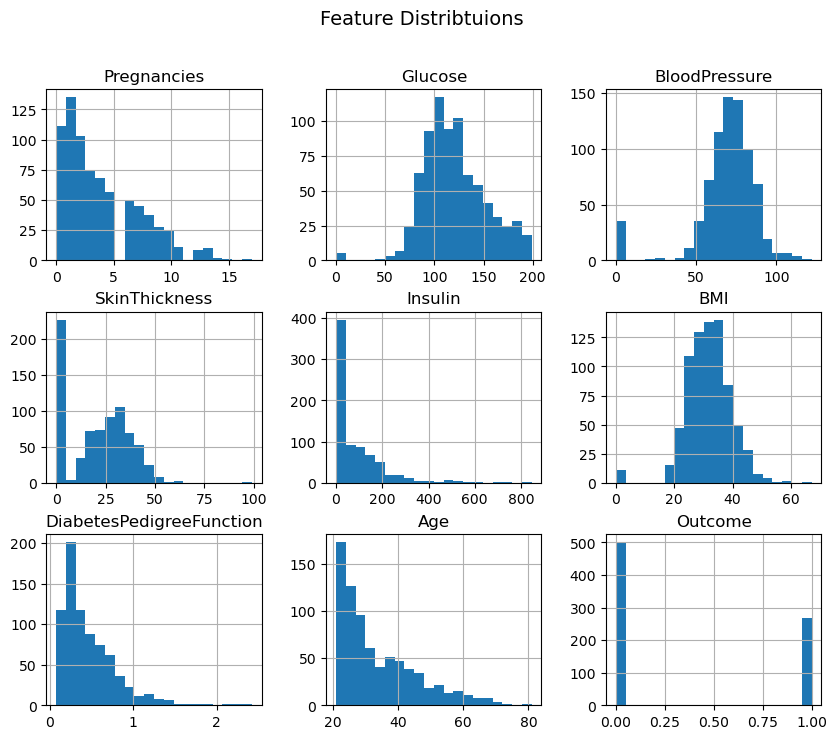

In [82]:
#Data distribution
plt.figure(figsize=(10,6))
df.hist(figsize=(10,8),bins=20)
plt.suptitle("Feature Distribtuions",fontsize = 14)
plt.show()

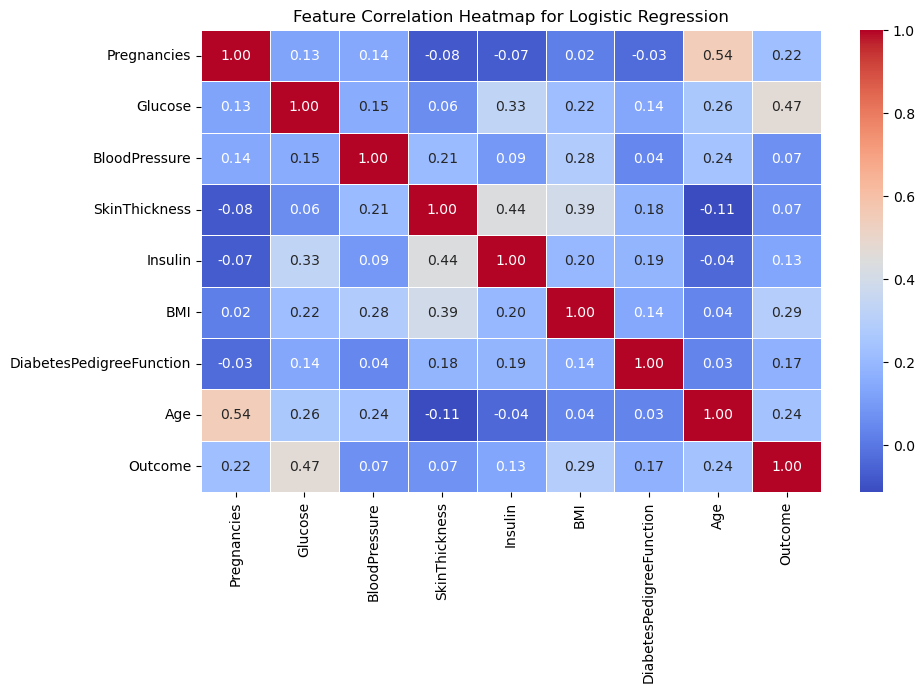

In [19]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Feature Correlation Heatmap for Logistic Regression")
plt.show()


In [21]:
X=df.drop(columns=['Outcome'])#scaling preprocessing everything happens on X 
y=df['Outcome']

In [23]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [56]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Apply scaling to training data
X_test_scaled = scaler.transform(X_test)

In [60]:
log_reg=LogisticRegression()
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [62]:
y_pred = log_reg.predict(X_test_scaled)  # Predicted class labels
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]  # Predicted probabilities for the positive class


In [66]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f" Accuracy: {accuracy:.2f}")

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

 Accuracy: 0.71
Confusion Matrix:
[[82 18]
 [26 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



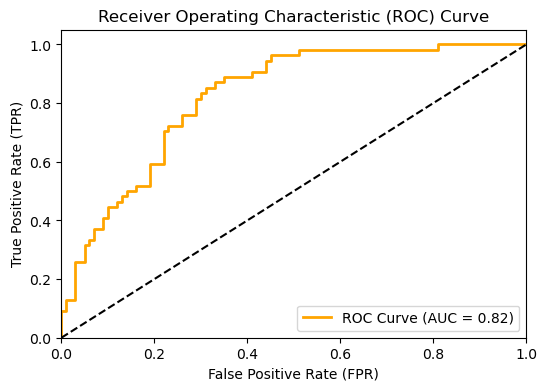

In [78]:
from sklearn.metrics import roc_auc_score, roc_curve, auc  # ROC and AUC
# ROC AUC curve 
# Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# DATASET 2

In [5]:
# importing the dataset
df = pd.read_csv('Practice dataset Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
print("Dataset Preview:\n",df.head())
print("\nDataset Info:\n",df.info())
print("\nMissing Values:\n",df.isnull().sum)

Dataset Preview:
     User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB

Dataset Info:
 None

Missing Values:
 <bound method DataFrame.sum of      User ID  Gender    Age  EstimatedSalary  Purchased
0      False   False  False            False      False
1      False

<Figure size 1000x600 with 0 Axes>

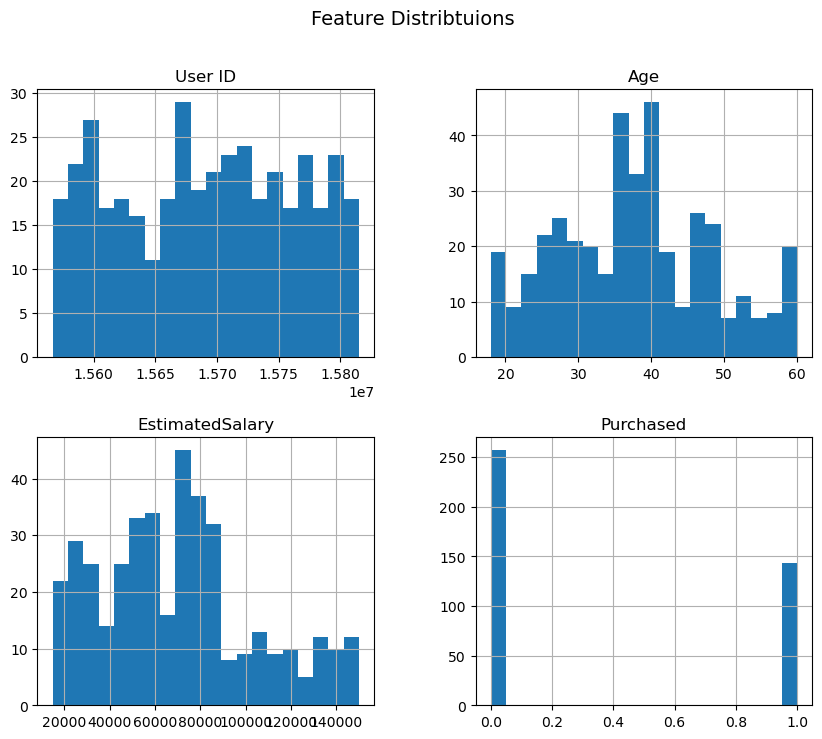

In [9]:
#Data distribution
plt.figure(figsize=(10,6))
df.hist(figsize=(10,8),bins=20)
plt.suptitle("Feature Distribtuions",fontsize = 14)
plt.show()

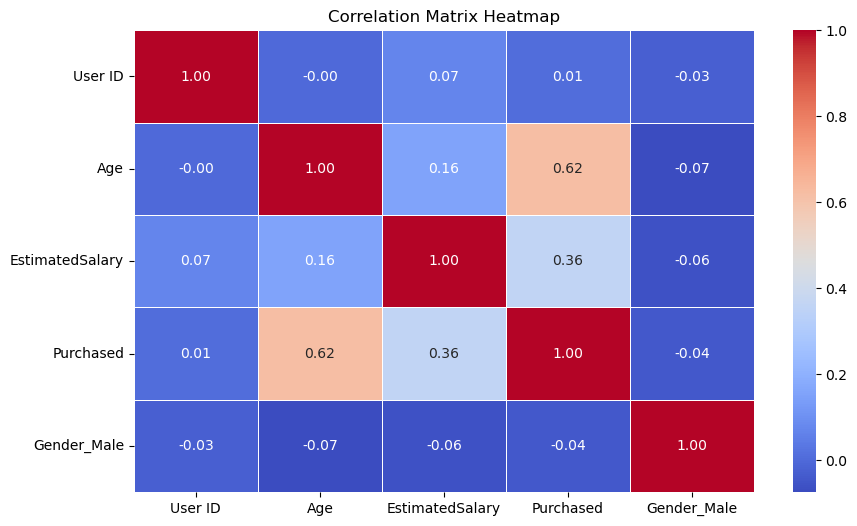

In [23]:


# Convert categorical columns to numerical (One-Hot Encoding)
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)  # Converts 'Male'/'Female' into 0/1

# Compute correlation matrix (now only numeric values)
corr_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()



In [13]:
# Select relevant features
X = df[['Age', 'EstimatedSalary']]  # Independent variables
y = df['Purchased']  # Dependent variable

In [17]:
#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
log_reg=LogisticRegression()
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [31]:
y_pred = log_reg.predict(X_test_scaled)  # Predicted class labels
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]  # Predicted probabilities for the positive class


In [33]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f" Accuracy: {accuracy:.2f}")

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

 Accuracy: 0.86
Confusion Matrix:
[[50  2]
 [ 9 19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



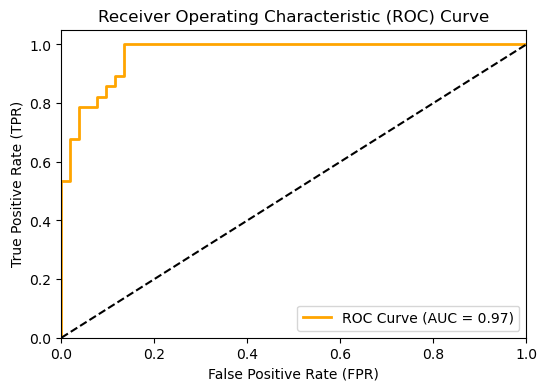

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve, auc  # ROC and AUC
# ROC AUC curve 
# Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()